# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import os
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.polynomial.polynomial import polyfit
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# importing the csv file into the Dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Open dataframe content
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Downloading the file
folder_name = 'C:/Users/FEN/anaconda3/envs/data_wrang'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Writing to the filehandle
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Checking if file downloaded
files = os.listdir(folder_name)
for file in files:
    if file.endswith('.tsv'):
        print(file)
        

image-predictions.tsv


image-predictions.tsv downloaded successfully

In [6]:
# Reading tsv data into the Dataframe
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# Opening content of tsv file in dataframe
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256


In [8]:
# Create an empty lists to contain the re-tweets and favorites counts for each tweet id
rt_list = []
t_attributes = ['id', 'retweet_count','favorite_count']

# Append each JSON data to the empty list
with open('tweet-json.txt') as json_file:
    for line in json_file:
        jdata = json.loads(line[:-1])
        rt_list.append({t_attributes[0]: jdata[t_attributes[0]]
                        , t_attributes[1]: jdata[t_attributes[1]]
                        , t_attributes[2]: jdata[t_attributes[2]]})

# Create dataframe from the list
df_json = pd.DataFrame(data = rt_list, columns = t_attributes)

In [9]:
# Opening content of the dataframe
df_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
# Investigating the data types of the columns
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

tweet_id needs to be string not integer

In [12]:
# Checking for odd dog names
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [13]:
# Most of the odd dog names begin with a lowercase letter and others have "None" as the values
# Checking the total number of odd dog names
odd_name = [name for name in df_archive.name.unique() if name.lower() == name or name == 'None']
df_archive.query('name in @odd_name').shape[0]

854

In [14]:
# Printing all the odd dog names
for name in odd_name:
    print(name)

None
such
a
quite
not
one
incredibly
mad
an
very
just
my
his
actually
getting
this
unacceptable
all
old
infuriating
the
by
officially
life
light
space


In [15]:
# Checking if all the rating_denominator values are equal to 10
df_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [16]:
# There were values not equal to 10
# Checking the total number of values of rating_denominator not equal to 10
(df_archive.rating_denominator != 10).sum()

23

In [17]:
# Checking the number of "None" values in the columns below 
column_list = ['name', 'doggo', 'floofer', 'pupper','puppo']
for column in column_list:
    print(column, df_archive[df_archive[column] == "None"].shape[0])

name 745
doggo 2259
floofer 2346
pupper 2099
puppo 2326


In [18]:
# Checking the number of retweets
df_archive.retweeted_status_user_id.notna().sum()

181

In [19]:
# Checking the number of replies
df_archive.in_reply_to_status_id.notna().sum()

78

There are 181 and 71 records of retweets and reply respectively

In [20]:
# Investigating the data types of the columns
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> tweet_id needs to be string not integer

> img_num needs to be renamed

In [21]:
# Investing the data type of the columns
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


id needs to be string not integer

### Quality issues
##### twitter_archive_enhanced table

1. timestamp data type is object instead of datetime and tweet_id data type is integer instead of object(string)

2. some values in *rating_denominator* are not equal to 10

3. Some columns (*name, doggo, floofer, pupper, and puppo*) use "None" instead of NaN for missing values

4. Some of the dog names such as "None", such,"a", etc. are inaccurate

5. Any information on retweets and replies are not relevant to this project

##### image-predictions table

6. *tweet_id* data type is integer instead of object(string)

7. Column name, *img_num* should be descriptive

##### tweet-json table

8. *id* data type is integer instead of object(string)

9. Column name, *id* inconsistent with similar column names in the other tables (i.e. *tweet_id*)

### Tidiness issues
1. Each variable in a single column called dog_stages, instead of having four columns (*doggo, floofer, pupper and puppy* ) for each variable.
2. Each observation in a single dataframe, instead of having three dataframes for each observation.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Copy of twitter_archive_enhanced.csv data
df_archive_clean = df_archive.copy()

# Copy of image-predictions.tsv data
df_image_clean = df_image.copy()

# Copy of tweet_json.txt data
df_json_clean = df_json.copy()

## 1. Quality Issues

## twitter_archive_enhanced table

### Issue #1: timestamp data type is object instead of datetime and tweet_id data type is integer instead of object(string)

#### Define: 
- 1. Change timestamp data type to datetime
- 2. Change the data type of tweet_id from integer to object (string)

#### Code

In [23]:
# Converting data type to datetime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

In [24]:
# Converting tweet_id data type to string(object)
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)

#### Test

In [25]:
# Data type successfully converted
df_archive_clean.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


In [26]:
# Conversion successful
df_archive_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


### Issue #2: some values in *rating_denominator* are not equal to 10 

#### Define: Overwrite all the values not equal to 10 in the rating_denominator column with a value of 10

#### Code

In [27]:
# Replacing all the 23 values not equal to 10
df_archive_clean.loc[df_archive_clean['rating_denominator'] !=10, 'rating_denominator'] = 10

#### Test

In [28]:
# Checking if there are any values not equal to 10. Successfully replaced
(df_archive_clean.rating_denominator != 10).sum()

0

### Issue #3: Some columns (*name, doggo, floofer, pupper, and puppo*) use "None" instead of "NaN" for missing values

#### Define: Replace all the "None"  values in all the listed columns with "NaN"

#### Code

In [29]:
# Replacing "None" with "NaN"
column_list = ['name', 'doggo', 'floofer', 'pupper','puppo']
for column in column_list:
    df_archive_clean.loc[df_archive_clean[df_archive_clean[column] == "None"].index, column] = np.nan


#### Test

In [30]:
# Checking if the above syntax worked. "None" values successfully replaced
for column in column_list:
    print(column, df_archive_clean[df_archive_clean[column] == "None"].shape[0])

name 0
doggo 0
floofer 0
pupper 0
puppo 0


### Issue #4: Some of the dog names such as "None", such,"a", etc. are inaccurate

#### Define: Replace all the erroneous values in the name column
- Create a sub-dataframe from twitter-archive-enhanced table with the text and name columns
- Extract dog names from the text column or fill in with "NaN" where name is not available into a new column called new_name in the sub-dataframe
- Replace erroneous names with the correct names using the new_name column
>Some of the erroneous dog names start with a lowercase and the rest are "None" values

#### Code

In [31]:
# Creating a sub-dataframe from twitter-archive-enhanced dataframe with the text and name columns
odd_name = [name for name in df_archive.name.unique() if name.lower() == name or name == 'None']
df_names = df_archive.query('name in @odd_name').loc[:, ['text','name']]

# Extracting name-like string from text column if any into a new column called new_name
name_format = '(?:named|name is)\s([A-Z][a-z]+)'
df_names['new_name'] = df_names.text.str.extract(pat = name_format)

# Displaying content of the sub-dataframe
pd.set_option('display.max_colwidth',None)
df_names.sample(50)

,text,name,new_name
2249,This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba,a,Cheryl
1286,RT if you are as ready for summer as this pup is 12/10 https://t.co/xdNNEZdGJY,None,NaN
1587,Strange pup here. Easily manipulated. Rather inbred. Sharp for a dog. Appears uncomfortable. 8/10 would still pet https://t.co/nSQrhwbk1V,None,NaN
2242,Wow. Armored dog here. Ready for battle. Face looks dangerous. Not very loyal. Lil dog on back havin a blast. 5/10 https://t.co/SyMoWrp368,None,NaN
754,Oh my god it's Narcos but Barkos. 13/10 someone please make this happen\nhttps://t.co/tird9cIlzB,None,NaN
2258,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,None,NaN
269,"We don't rate penguins, but if we did, this one would get 12/10 https://t.co/cEORXhwZ5K",None,NaN
912,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,None,NaN
314,We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL,None,NaN
2326,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,quite,NaN


In [32]:
# Replacing erroneous names with the correct names using the values in the new_name column
df_archive_clean.loc[df_names.index, 'name'] = df_names['new_name']

#### Test

In [33]:
# Printing all the dog names where name starts with a lowercase or name is "None"
df_archive_clean.name = df_archive_clean.name.astype(str)
odd_name = [name for name in df_archive_clean.name.unique() if name == 'None' or name.lower() == name]
df_names = df_archive.query('name in @odd_name').loc[:, ['text','name']]
for name in odd_name:
    print(name)

nan


All the lower case values and "None" values in name column have been replaced

### Issue #5: Any information on retweets and replies are not relevant to this project

#### Define:
- 1. Remove all the retweets and reply rows from the table
- 2. Drop the following columns: *'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'*

#### Code

In [34]:
# Removing all the retweets rows
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean.retweeted_status_id)]

In [35]:
# Removing all the reply rows
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean.in_reply_to_status_id)]

#### Test

In [36]:
# Rechecking the number of retweets
df_archive_clean.retweeted_status_user_id.notna().sum()

0

In [37]:
# Rechecking the number of rows for replied tweet
df_archive_clean.in_reply_to_status_id.notna().sum()

0

Retweets and reply rows successfully removed

#### Code

In [38]:
# Dropping all columns related to retweets and reply
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [39]:
# Checking
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

Columns successfully dropped

## image-predictions table

### Issue #6: tweet_id data type is integer instead of object(string)

#### Define: Change the data type of tweet_id from integer to object (string)

#### Code

In [40]:
# Converting tweet_id data type to string (object)
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)

#### Test

In [41]:
# Conversion successful
df_image_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


### Issue #7: Column name, *img_num* should be descriptive

#### Define: Rename *img_num* to *image_number*

#### Code

In [42]:
# Renaming column
df_image_clean.rename(columns={'img_num':'image_number'}, inplace=True)

#### Test

In [43]:
# Checking if the above syntax worked
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

column successfully renamed

## tweet-json table


### Issue #8: *id* data type is integer instead of object(string)

#### Define: Change the data type of *id* column from integer to object (string)

#### Code

In [44]:
# Converting id data type to string (object)
df_json_clean.id = df_json_clean.id.astype(str)

#### Test

In [45]:
# Conversion successful
df_json_clean.id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


### Issue #9: Column name, id inconsistent with similar column names in the other tables (i.e. tweet_id)

#### Define: Rename column name, *id* to *tweet_id*

#### Code

In [46]:
# Renaming column name, id to tweet_id
df_json_clean = df_json_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [47]:
# id column name changed to tweet_id
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## 2. Tidiness Issues

### Issue #1: Each variable in a single column called dog_stages, instead of having four columns (*doggo, floofer, pupper and puppy* ) for each variable.

#### Define: merge the four columns, doggo, floofer, pupper and puppy into a single column  called dog_stages
 - Extract and assign the values in each of the four columns into a new column called dog_stages
 - Drop the four columns, i.e. doggo, floofer, pupper and puppy

#### Code

In [48]:
# Creating a sub-dataframe of columns representing dog stages
df_stages = df_archive_clean.loc[:, ['doggo', 'floofer', 'pupper', 'puppo']]

# Adding new column(dog_stages) to df_archive_clean and populating with values from the four columns in the sub-dataframe
df_archive_clean['dog_stages'] = df_stages.apply(lambda x: ','.join(x.dropna()), axis = 1)

# Replacing empty values with "NaN" in df_archive_clean
df_archive_clean['dog_stages'].replace(to_replace = '', value = np.nan, inplace = True)

# Dropping the four columns from df_archive_clean
df_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [49]:
# Checking if the above syntax worked
df_archive_clean.sample(10)
#Successfully created a new column populated with values from the four dropped columns

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
687,788039637453406209,2016-10-17 15:31:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Did... did they pick out that license plate? 12/10 for both https://t.co/lRmUUOxgbQ,"https://twitter.com/dog_rates/status/788039637453406209/photo/1,https://twitter.com/dog_rates/status/788039637453406209/photo/1",12,10,nan,NaN
766,777684233540206592,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,nan,NaN
747,779834332596887552,2016-09-25 00:06:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD,"https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1",11,10,Scout,NaN
1680,682003177596559360,2015-12-30 01:00:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Wrinkly as hell. Weird segmented neck. Finger on fire. Doesn't seem to notice. 5/10 might still pet https://t.co/Hy9La4xNX3,https://twitter.com/dog_rates/status/682003177596559360/photo/1,5,10,nan,NaN
1982,672968025906282496,2015-12-05 02:37:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gustaf. He's a purebred Chevy Equinox. Loves to shred. Gnarly lil pup. Great with the babes. 11/10 https://t.co/7CbO2eMAgJ,https://twitter.com/dog_rates/status/672968025906282496/photo/1,11,10,Gustaf,NaN
876,761004547850530816,2016-08-04 01:03:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,https://twitter.com/dog_rates/status/761004547850530816/photo/1,11,10,Bo,NaN
2278,667435689202614272,2015-11-19 20:14:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,nan,NaN
468,817056546584727552,2017-01-05 17:13:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chloe. She fell asleep at the wheel. Absolute menace on the roadways. Sneaky tongue slip tho. 11/10 https://t.co/r6SLVN2VUH,https://twitter.com/dog_rates/status/817056546584727552/photo/1,11,10,Chloe,NaN
90,874680097055178752,2017-06-13 17:29:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Cash. He hath acquired a stick. A very good stick tbh. 12/10 would pat head approvingly https://t.co/lZhtizkURD,https://twitter.com/dog_rates/status/874680097055178752/photo/1,12,10,Cash,NaN
1900,674664755118911488,2015-12-09 18:59:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,https://twitter.com/dog_rates/status/674664755118911488/photo/1,10,10,Rodman,NaN


### Issue #2: Each observation in a single dataframe, instead of having three dataframes for each observation.

#### Define: Merge the three dataframes df_archive_clean, df_json_clean & df_image_clean) into a single dataframe (df_twitter_archive_master)

#### Code

In [50]:
# Merging all the three dataframes
df_twitter_archive_master = pd.merge(pd.merge(df_archive_clean,df_json_clean,on='tweet_id'),df_image_clean,on='tweet_id')

#### Test

In [51]:
# Checking if the merge syntax worked
df_twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'retweet_count', 'favorite_count', 'jpg_url', 'image_number', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

All the three dataframes merged into a single master dataframe successfully

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
# Saving master dataframe to disk
df_twitter_archive_master.to_csv('C:/Users/FEN/anaconda3/envs/data_wrang/twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

The analysis and visualization will be conducted utilizing a carefully cleaned and organized dataframe, specifically the one referred to as df_twitter_archive_master, which serves as the primary source of information for this analysis.

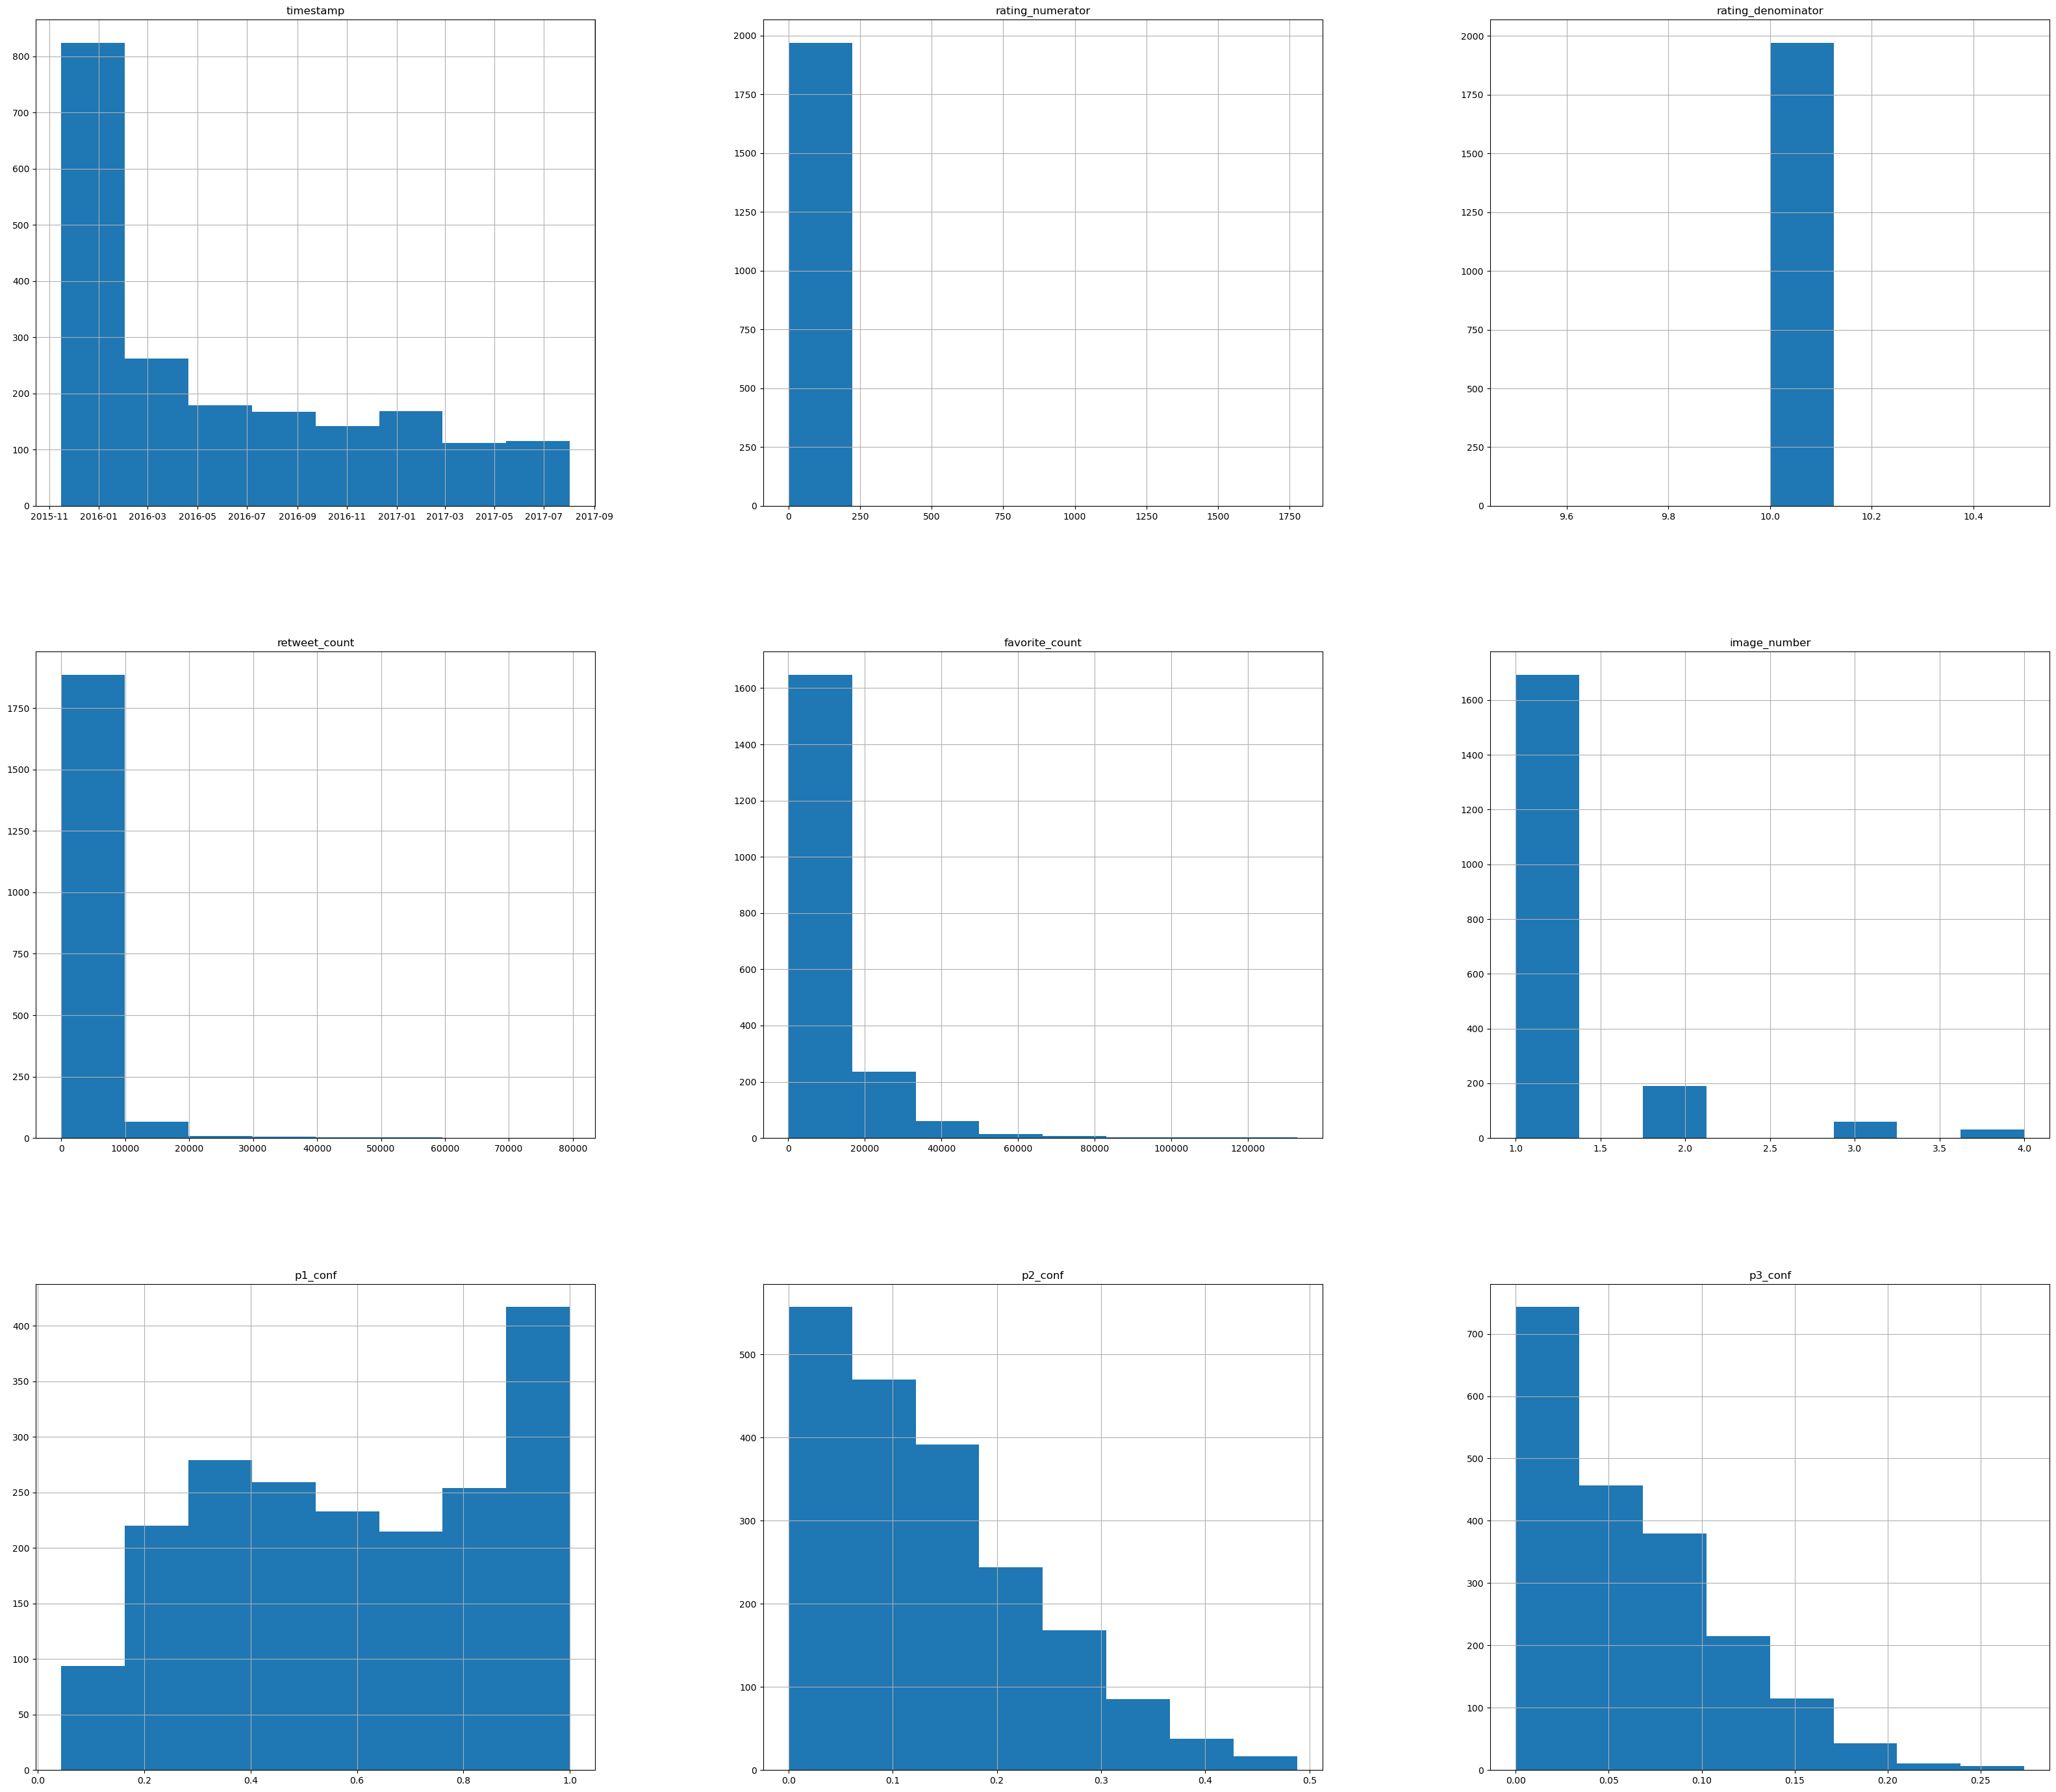

In [53]:
# Examining the distribution of the data through histograms
df_twitter_archive_master.hist(figsize= (40,35), bins=8);

Majority of the datasets are positively skewed

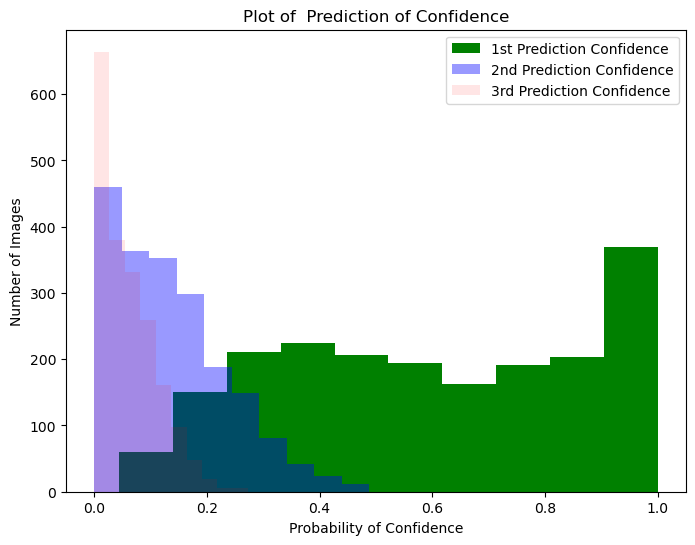

In [54]:
# Focusing on the predictions of confidence using histograms
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_twitter_archive_master.p1_conf, alpha=1, color='green', label='1st Prediction Confidence')
ax.hist(df_twitter_archive_master.p2_conf, alpha=0.4, color='blue', label='2nd Prediction Confidence')
ax.hist(df_twitter_archive_master.p3_conf, alpha=0.1, color='red', label='3rd Prediction Confidence')
ax.set_title('Plot of  Prediction of Confidence')
ax.set_xlabel('Probability of Confidence')
ax.set_ylabel('Number of Images')
ax.legend(loc='upper right')
plt.show();

In [55]:
# Defining a function to calculate for percentages of variables
def PercentCalc(count, totals):
    return (count/totals)*100

In [56]:
# Calculating for the percentages of the dog breeds
counts = df_twitter_archive_master['dog_stages'].value_counts()
totals = df_twitter_archive_master['dog_stages'].count()
prop = PercentCalc(counts, totals)
prop

pupper           66.336634
doggo            20.792079
puppo             7.260726
doggo,pupper      2.640264
floofer           2.310231
doggo,puppo       0.330033
doggo,floofer     0.330033
Name: dog_stages, dtype: float64

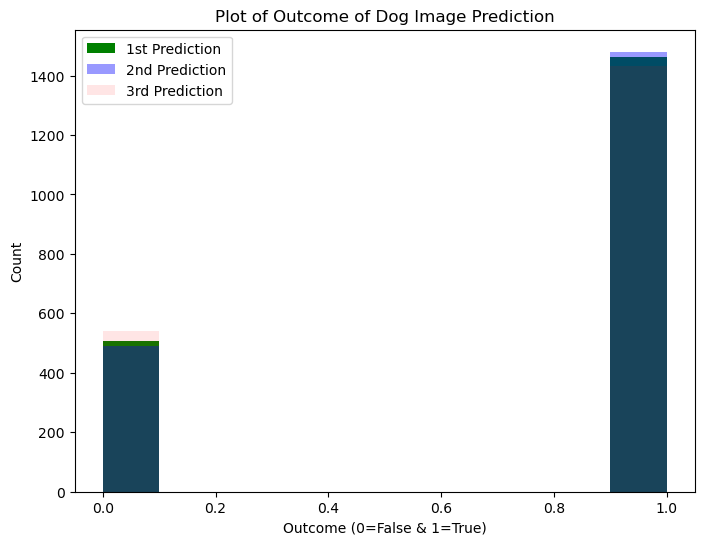

In [57]:
# Investigating the outcome of the prediction of dog images
df_twitter_archive_master.p1_dog = df_twitter_archive_master.p1_dog.astype(float)
df_twitter_archive_master.p2_dog = df_twitter_archive_master.p2_dog.astype(float)
df_twitter_archive_master.p3_dog = df_twitter_archive_master.p3_dog.astype(float)

fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_twitter_archive_master.p1_dog, alpha=1, color='green', label='1st Prediction')
ax.hist(df_twitter_archive_master.p2_dog, alpha=0.4, color='blue', label='2nd Prediction')
ax.hist(df_twitter_archive_master.p3_dog, alpha=0.1, color='red', label='3rd Prediction')
ax.set_title('Plot of Outcome of Dog Image Prediction')
ax.set_xlabel('Outcome (0=False & 1=True)')
ax.set_ylabel('Count')
ax.legend(loc='upper left')
plt.show();

### Insights:

1. From the histograms, the neural network used placed very high level of confidence on the first prediction (p1_conf) of the dog images than in the second (p2_conf) and third predictions (p2_conf)

2. Majority of the dogs rated are pupper breed (about 66%)

3. Though the confidence level by the neural network used was not too high in the second prediction of the dog images, it turns out that majority of the second predictions were true as seen in the plot above

### Visualization

The focus of this visualization will be to investigate the correlation between the retweet count and favorite count.

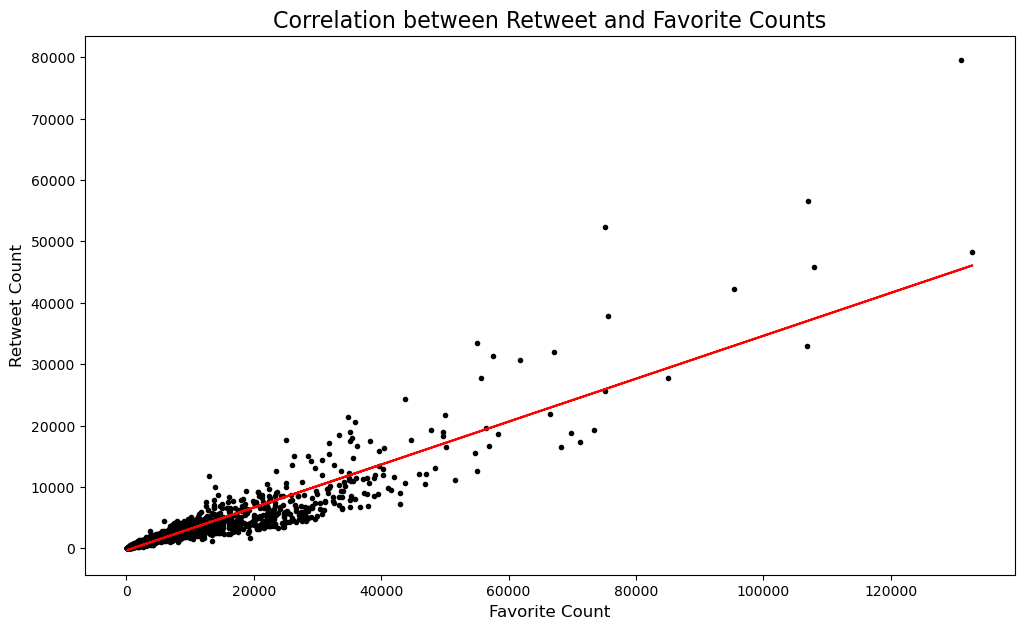

In [58]:
# configure plot with size, title, and labels for both axes
plt.figure(figsize = (12, 7))
plt.title('Correlation between Retweet and Favorite Counts', fontsize = 16)
plt.xlabel('Favorite Count', fontsize = 12)
plt.ylabel('Retweet Count', fontsize = 12)

# Sample data
x = df_twitter_archive_master.favorite_count
y = df_twitter_archive_master.retweet_count

# Fit with polyfit
b, m = polyfit(x, y, 1)

#Create scatter plot of retweet count vs favorite count with best fit line
plt.plot(x, y, '.', color='black', markersize=6)
linear_fit = plt.plot(x, b + m * x, '-', color='red')
plt.show()



There is a strong/positive correlation between retweet count and favorite count